In [1]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days = 5000)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('AAPL',
                  start=start_date,
                  end=end_date,
                  progress=False,
                  auto_adjust=False)

if isinstance(data.columns, pd.MultiIndex):
    data.columns = data.columns.droplevel(1)   # remove the "AAPL" under each column


data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close",
             "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)

In [2]:
data.tail()

Price,Date,Open,High,Low,Close,Adj Close,Volume
3438,2025-12-03,286.200012,288.619995,283.299988,284.149994,284.149994,43538700
3439,2025-12-04,284.100006,284.730011,278.589996,280.700012,280.700012,43989100
3440,2025-12-05,280.540009,281.140015,278.049988,278.779999,278.779999,47265800
3441,2025-12-08,278.130005,279.670013,276.149994,277.890015,277.890015,38211800
3442,2025-12-09,278.160004,280.029999,276.920013,277.179993,277.179993,32159900


In [12]:
import plotly.graph_objects as go
help(go.Candlestick)

Help on class Candlestick in module plotly.graph_objs._candlestick:

class Candlestick(plotly.basedatatypes.BaseTraceType)
 |  Candlestick(arg=None, close=None, closesrc=None, customdata=None, customdatasrc=None, decreasing=None, high=None, highsrc=None, hoverinfo=None, hoverinfosrc=None, hoverlabel=None, hovertemplate=None, hovertemplatefallback=None, hovertemplatesrc=None, hovertext=None, hovertextsrc=None, ids=None, idssrc=None, increasing=None, legend=None, legendgroup=None, legendgrouptitle=None, legendrank=None, legendwidth=None, line=None, low=None, lowsrc=None, meta=None, metasrc=None, name=None, opacity=None, open=None, opensrc=None, selectedpoints=None, showlegend=None, stream=None, text=None, textsrc=None, uid=None, uirevision=None, visible=None, whiskerwidth=None, x=None, xaxis=None, xcalendar=None, xhoverformat=None, xperiod=None, xperiod0=None, xperiodalignment=None, xsrc=None, yaxis=None, yhoverformat=None, zorder=None, **kwargs)
 |  
 |  Method resolution order:
 |     

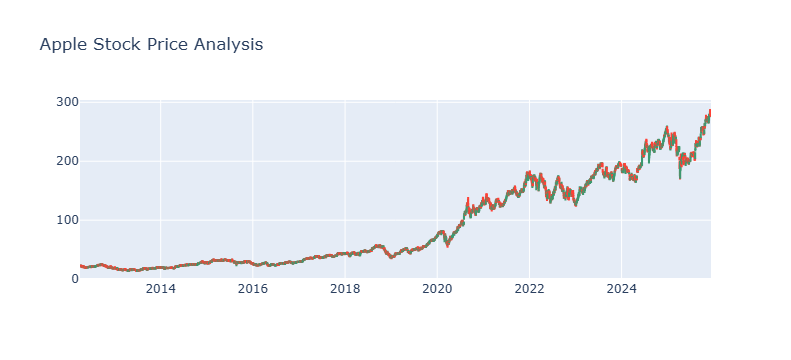

In [3]:
import plotly.graph_objects as go
figure = go.Figure(data=[go.Candlestick(x=data["Date"],
                                      open=data["Open"],
                                      high=data["High"],
                                      low=data["Low"],
                                      close=data["Close"])])
figure.update_layout(title = "Apple Stock Price Analysis",
                    xaxis_rangeslider_visible=False)

figure.show()

In [4]:
correlation = data.corr()
print(correlation["Close"].sort_values(ascending=False))

Price
Close        1.000000
Adj Close    0.999962
High         0.999883
Low          0.999879
Open         0.999742
Date         0.930996
Volume      -0.536615
Name: Close, dtype: float64


In [14]:
import sklearn
help(sklearn.model_selection.train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

In [8]:
x = data[["Open", "High", "Low", "Volume"]]
y = data["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(xtrain.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

C:\Users\USER\miniconda3\envs\ds4b\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape   ┃ Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ lstm_2 (LSTM)       │ (None, 4, 128) │  66,560 │
├─────────────────────┼────────────────┼─────────┤
│ lstm_3 (LSTM)       │ (None, 64)     │  49,408 │
├─────────────────────┼────────────────┼─────────┤
│ dense_2 (Dense)     │ (None, 25)     │   1,625 │
├─────────────────────┼────────────────┼─────────┤
│ dense_3 (Dense)     │ (None, 1)      │      26 │
└─────────────────────┴────────────────┴─────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(xtrain, ytrain, batch_size=1, epochs=30)

Epoch 1/30
2754/2754 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 814.3448
Epoch 2/30
2754/2754 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 35.8546
Epoch 3/30
2754/2754 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 25.2978
Epoch 4/30
2754/2754 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 29.6929
Epoch 5/30
2754/2754 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 28.9478
Epoch 6/30
2754/2754 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 17.3286
Epoch 7/30
2754/2754 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 21.8877
Epoch 8/30
2754/2754 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 24.7098
Epoch 9/30
2754/2754 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 33.0237
Epoch 10/30
2754/2754 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 20.2515
Epoch 11/30
2754/2754 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - loss: 17.3166
Epoch 12/30
2754/2754 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 17.7041
Epoch 13/30
2754/2754 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - loss: 15.9583
Epoch 14/30
2754/2754 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 20.1685


In [11]:
import numpy as np
#features = [Open, High, Low, Adj Close, Volume]
features = np.array([[177.089996, 180.419998, 177.070007, 74919600]])
model.predict(features)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 696ms/step


array([[177.4095]], dtype=float32)